In [2]:
%load_ext autoreload
%autoreload 1
%aimport SparseMatrix
from SparseMatrix import *
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

### Test SOR method on a random matrix

In [3]:
A = generateSparseSDDMatrix(50) # Random matrix
x_real = np.random.rand(len(A)) * 100 - 50 # Random vector that we are trying to find
b = A @ x_real # Right side of the equation

# Random initial approximation for all ranges of omega parameter so we get comparable results
x0 = np.random.rand(len(A))
max_iter = 1000

omegas = np.arange(0.1,2,0.1)
errs = []
for omega in tqdm(omegas):
  x, it = sor(A,b, x0, omega, max_iter=max_iter)
  err = np.max(np.abs(x_real - x))
  errs.append([err,it])

100%|██████████| 19/19 [00:03<00:00,  5.96it/s]


Visualize the results

Optimal value for omega is 1.0, 15/19 converged where average error is 5.666578317686799e-14


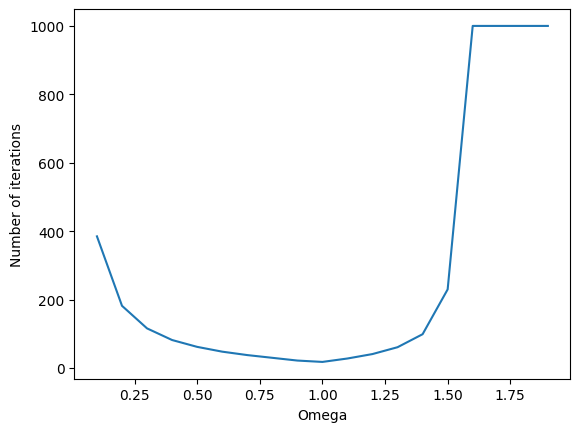

In [4]:
errs = np.array(errs)

fig, ax = plt.subplots()
ax.plot(omegas, errs[:,1])
ax.set_xlabel("Omega")
ax.set_ylabel("Number of iterations")

print(f"Optimal value for omega is {omegas[np.argmin(errs[:,1])]}, {np.count_nonzero(errs[:,1] < 1000)}/{omegas.shape[0]} converged where average error is {np.average(errs[errs[:,1] < 1000, 0])}")

### Test SOR method for graph drawing with Force-Directed Graph Drawing

Converged after 114 iterations


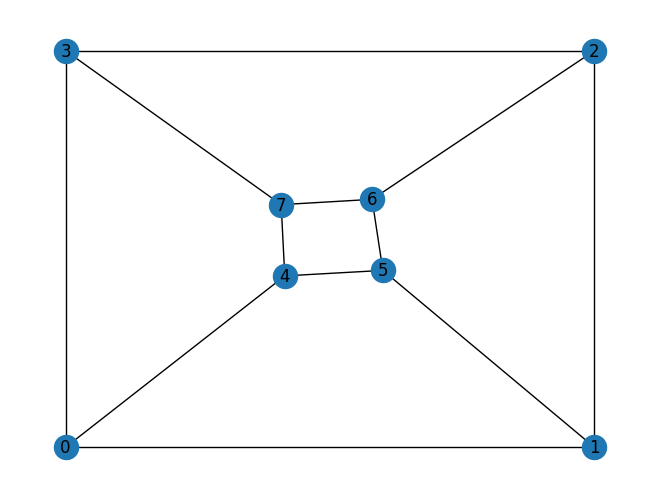

In [5]:
edges = [[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [6, 7], [7, 4], [0, 4], [1, 5], [2, 6], [3, 7]]
initial_pos = {0: [0, 0], 1: [1, 0], 2: [1, 1], 3: [0, 1]}

graph = nx.Graph(edges)
pos, it = getGraphPosSOR(graph, initial_pos)
nx.draw(graph, pos, with_labels=True)
print(f"Converged after {it} iterations")

Converged after 217 iterations


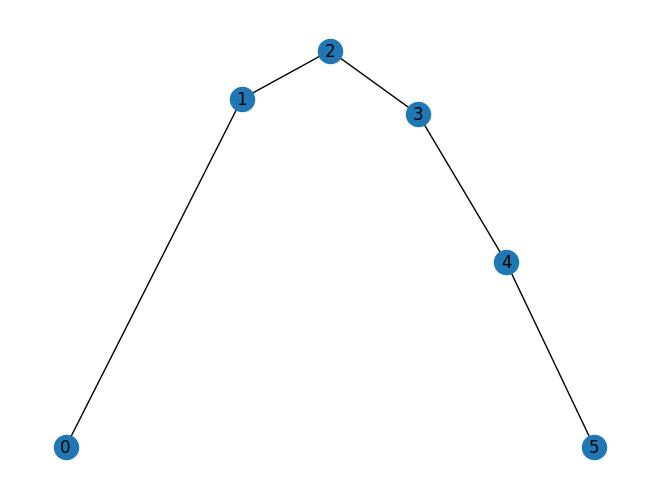

In [6]:
edges = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]
initial_pos = {0: [0, 0], 5: [1, 0]}

graph = nx.Graph(edges)
pos, it = getGraphPosSOR(graph, initial_pos)
nx.draw(graph, pos, with_labels=True)
print(f"Converged after {it} iterations")